In [1]:
#Importing lib.
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['science', 'notebook', 'grid'])

## Equation of Forced oscillator
$$\ddot x+2 b \dot x + \omega ^2 x = f_d \cos(\omega_d t)$$

Transient Sol: $$x = \frac{f_d}{\sqrt{(\omega_d ^2 - \omega ^2)^2+4b^2 \omega_d^2}}\cos(\omega_d t - \phi)$$

The amplitude of the steady-state oscillation is given by
$$\mathcal{A} = \frac{f_d}{\sqrt{(\omega_d ^2 - \omega ^2)^2+4b^2 \omega_d^2}}$$

**Resonance frequency is given by**: $\omega_R = \sqrt{\omega^2 - b^2}$

In [2]:
def Forced_Oscillator(t, x, v, tf,h ,b , w, f_d, w_d):
    #Diffantial equation
    def f(x, v, t):
        return -2*b*v - w**2*x + f_d*np.cos(w_d*t)
    #Empty lists
    tt, xx = [], []
    while (t - tf <= h):
        tt.append(t)
        xx.append(x)
        x += h*v
        v += h*f(x, v, t)
        t += h
    return tt, xx

> I intentionally take $\omega = \sqrt{24}$ and $b = 2$ such that the resonance frequency becomes $\omega_R = 4$

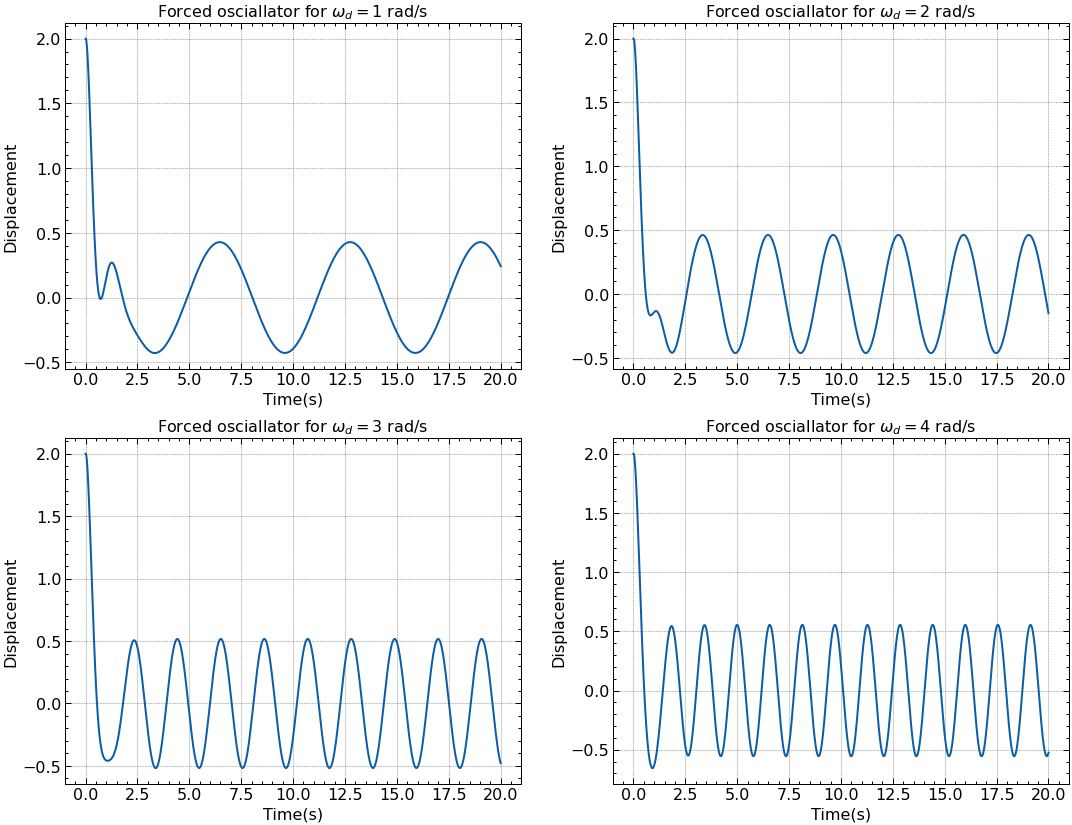

In [3]:
#Parameters
t = 0; x = 2; v = 0; tf = 20; h = 0.01; b = 2; w = np.sqrt(24); f_d = 10;

#To plot some oscillations
plt.figure(figsize=(18, 14))
for w_d in range(1, 5):
    plt.subplot(2, 2, w_d)
    tim, dis = Forced_Oscillator(t, x, v, tf,h ,b , w, f_d, w_d)
    plt.plot(tim, dis)
    plt.title(r"Forced osciallator for $\omega_d = $"+ str(w_d)+" rad/s")
    plt.xlabel("Time(s)")
    plt.ylabel("Displacement")
plt.show()

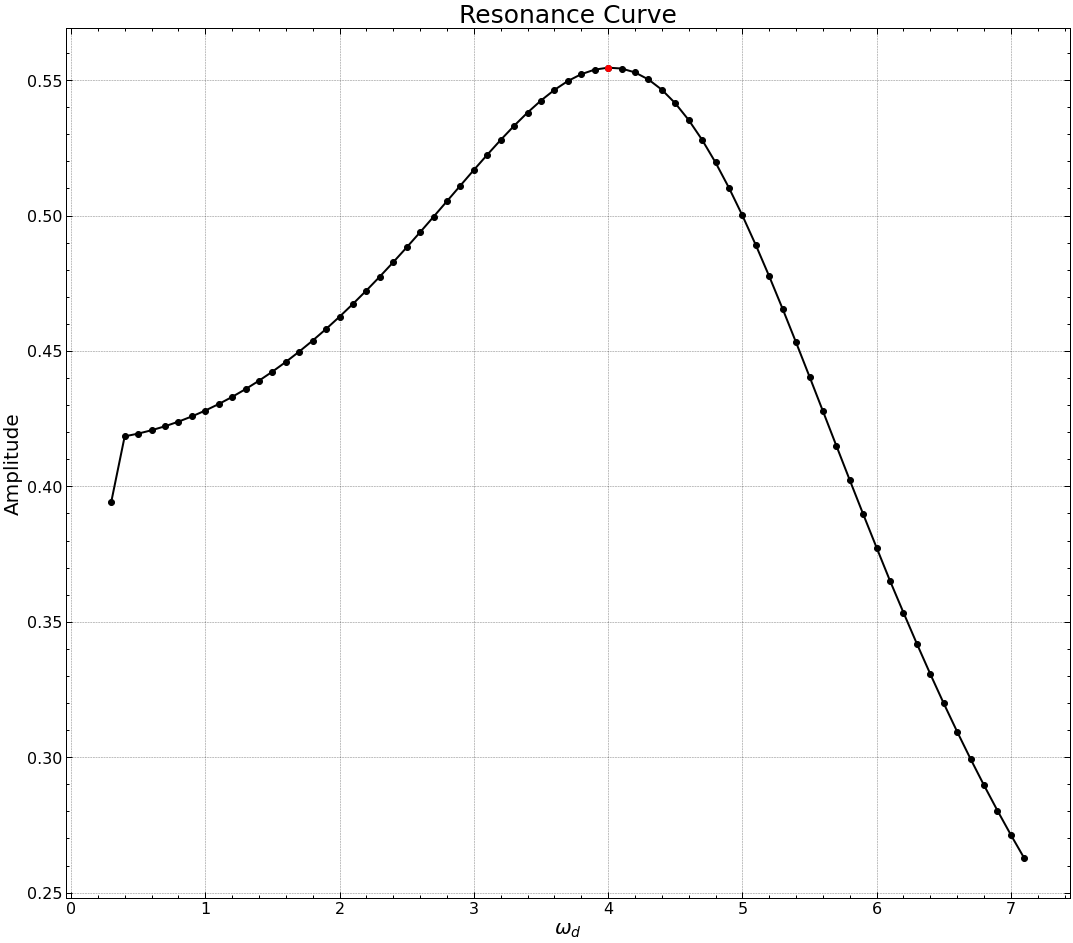

Resonance frequency is 4.000000000000002


In [6]:
n = 1 + (tf - t)/h

w_d = 0.2

WD = []
Res = []

while (w_d <= 7):
    w_d += 0.1
    WD.append(w_d)
    tim, dis = Forced_Oscillator(t, x, v, tf,h ,b , w, f_d, w_d)
    Res.append(max(dis[-int(n/2):]))

#Index of max of Res
MI = Res.index(max(Res))
    
plt.figure(figsize=(18, 16))
plt.title("Resonance Curve", size = 25)
plt.plot(WD, Res, "-ko")
plt.xlabel(r"$\omega_d$", size = 20)
plt.ylabel(r"Amplitude", size = 20)
plt.plot(WD[MI], max(Res),"ro")
plt.show()
print("Resonance frequency is",WD[MI])